# Import libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Load data

In [30]:
file_path = r'C:\Users\ajay4\OneDrive\Documents\Resume\Data science course\Data\iris_dataset.csv'
data = pd.read_csv(file_path)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


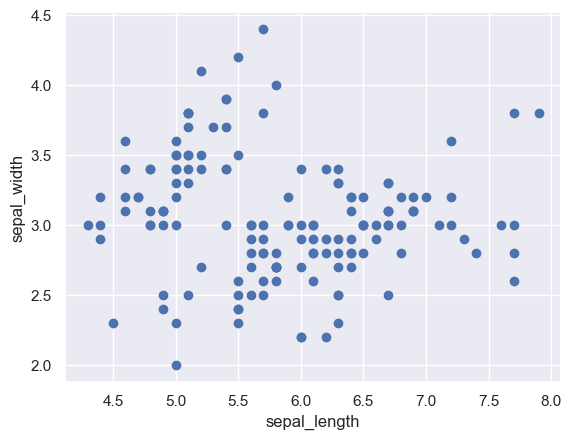

In [32]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# Clustering

In [35]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [53]:
clusters = data.copy()
clusters['clusters_pred'] = kmeans.fit_predict(x)
clusters

C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,clusters_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


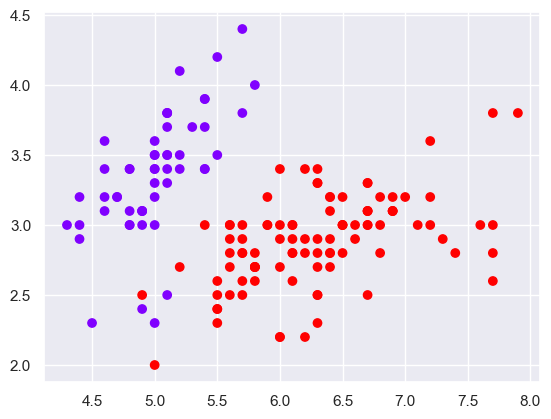

In [55]:
plt.scatter(clusters['sepal_length'],clusters['sepal_width'], c = clusters['clusters_pred'], cmap = 'rainbow')

# Standardzation

In [64]:
x_scaled = preprocessing.scale(data)

# Clustering for scaled data 

In [67]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [71]:
clusters_scaled = data.copy()
clusters_scaled['clusters_pred'] = kmeans_scaled.fit_predict(x_scaled)

C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


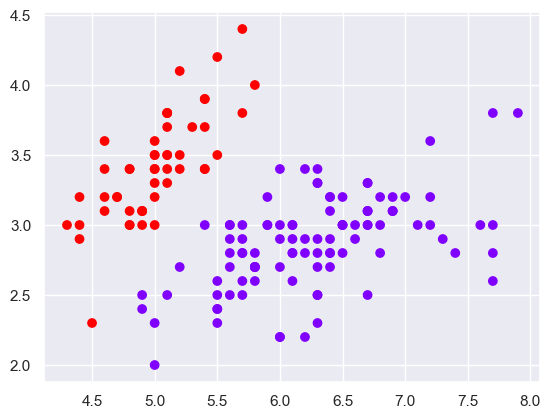

In [75]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c = clusters_scaled['clusters_pred'], cmap = 'rainbow') 

# Take the advantages of Elbow method

# wcss

In [88]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ajay4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[600.0,
 223.73200573676345,
 142.11063713104198,
 114.64461415589166,
 106.80216401254351,
 81.77514468186396,
 89.7154297505889,
 67.12020268046736,
 55.38272853338333]

# Elbow method

Text(0, 0.5, 'Within-cluster Sum of Squares')

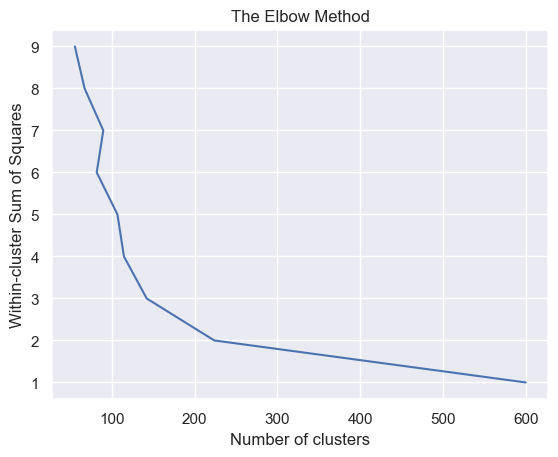

In [93]:
number_clusters = range(1,10)
plt.plot(wcss,number_clusters)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')